## Preface 

Originally, the "Complex Subplots" lesson, began with the explanation and examples that you see below, but this portion of the course was cut in order to keep the course from becoming too long. Since this material, essentially, took a deeper dive into how subplotting works than was necessary to understand it, it was deemed as unecessary for the course. I have, however, included it in the course repository as bonus material for those of you who have an insatiable curiousity and just want to delve deeper. So, enjoy!

## Introduction

In the "Complex Subplots" lesson, we saw how to use the `subplot2grid` function to create complex figures containing subplots of differing dimensions. In this lesson, we'll be looking into the `GridSpec` and `SubplotSpec` classes, the two classes that form the basis of the matplotlib subplotting mechanism. In other words, everytime you call the `subplot2grid` function, or for that matter, the `subplots` function, instances of the `GridSpec` and `SubplotSpec` classes are being created on your behalf. So, it behooves you to learn about these two fundamental classes if you really want to understand how subplotting works in matplotlib.

So, let's get set up and ready to explore the underpinnings of the matplotlib subplotting mechanism.

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## The `SubplotSpec` Class

We've already seen that we can call the `subplot` function with a set of integers, where the first two describe the shape of the grid and, the third specifies the index of the grid cell we want to create subplot in. What you may not know is that the `subplot` function will also take an instance of the `SubplotSpec` class. 

Where the `supblot` function allows us to specify just the location of a subplot, the `SubplotSpec` class allows us to specify both the location and the dimensions of a subplot. Specifically, `SubplotSpec` instances describe the location and dimensions of a subplot within an instance of the `GridSpec` class. The `GridSpec` class specifies the shape of a grid of subplots, and also acts as an interface for creating `SubplotSpec` instances. The two can be used together to give you much more control over the layout of your subplots than you have with just the `subplot` function by itself.

The example below, shows you how to create a relatively complex 3x2 grid layout by creating instances of the `SubplotSpec` class and passing them into the `subplot` function to create the corresponding plot, and add it to the current figure.

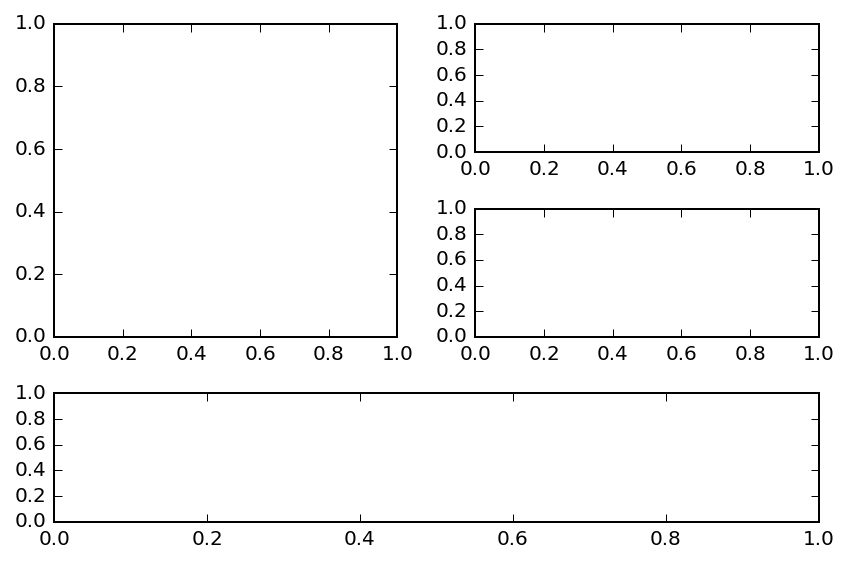

In [6]:
import matplotlib.gridspec as gridspec

# Create a 3x2 grid
gs = gridspec.GridSpec(3, 2)

# Create SubplotSpec instances for each subplot
s1 = gridspec.SubplotSpec(gs, 0, 2)      # rowspan = 2
s2 = gridspec.SubplotSpec(gs, 1)
s3 = gridspec.SubplotSpec(gs, 3) 
s4 = gridspec.SubplotSpec(gs, 4, -1)      # colspan = 2

# Draw the grid using the SubplotSpec objects created above.
plt.subplot(s1)
plt.subplot(s2)
plt.subplot(s3)
plt.subplot(s4)
plt.tight_layout()

As I just mentioned, the `GridSpec` and `SubplotSpec` classes are meant to work together, so the very first thing we'll need to do is create an instance of the `GridSpec` class with the dimensions of the grid we want to create. Line 4 creates a `GridSpec` instance with 3 rows and 2 columns.

Following that, lines 7-10 create instances of the `SubplotSpec` class. To create an instance of the `SubplotSpec` class, you call the constructor and pass in the `GridSpec` object that you want to place the subplot in, and two index values, the latter of which is optional. The first index will be the grid cell where the subplot your creating begins, and the second value is the index of the cell where the subplot ends. If you leave off the second value, the subplot begins and ends in the same cell. 

Lines 8 and 9 in the code above create a subplot that spans a single cell, so we pass into the `SubplotSpec` constructor just the first value, which is the index value of the cell we want to place our subplot in. Lines 7 and 10 are a little more interesting since the former will span 2 rows and the latter 2 columns. Given this requirement, we will start are first subplot in cell 0, the first cell in the grid, and end it in cell 2, the third cell in the grid and the first cell in the second row. For the last subplot in our figure, we want it to start in the first cell of the last row, in our case that would be the cell at index 4, and span two columns, in other words, end in the last cell of the last row, or index 5. Of course, you can also use python's ability to count backwards here as well, and pass in an index value of -1 to signify the last cell in the grid.

Finally, on lines 13-17 we call the `subplot` function with the `SubplotSpec` instances we just instantitated to create an `Axes` object for each one and add it to the current figure.

## The `GridSpec` Class

In the next bit of code, we create the exact same layout that we did above, but this time we'll use the `GridSpec` object's sequence-like interface to create each `SubplotSpec` instance. This interface is, in my opinion at least, much more flexible, intuitive, and understandable, and if you're at all comfortable with NumPy arrays, you'll be right at home with the `GridSpec` interface.

Using the `GridSpec` sequence-based interface, you can specify the index of a cell, the row and column coordinates for a cell. You can also pass in slices as the row or column coordinates to specify the number of rows or columns that you want a subplot to span. Lines 5 and 6 below, each create a subplot that spans just a single cell in the grid, but they do it differently in each case. On line 5, we are passing in the coordinates of the subplot we want to create, so we pass in 0 for the first row in the grid, and 1 for the second column. On the other hand, on line 6, we're simply passing in the index value for the cell we want. 

Lines 4 and 7 are the more interesting lines in this example. On line 4, we pass in a slice specifying that we want our subplot to span the first two rows of the first column---remember, a slice is exclusive, so the range of values from the slice does not include the number 2. On line 7, we specify that our subplot will be created in the last row, so again we'll use the value -1 to specify the last row, and it will span across all columns in that row, so we simply pass in a colon ':', or empty slice to mean, essentially, "give me everything". 

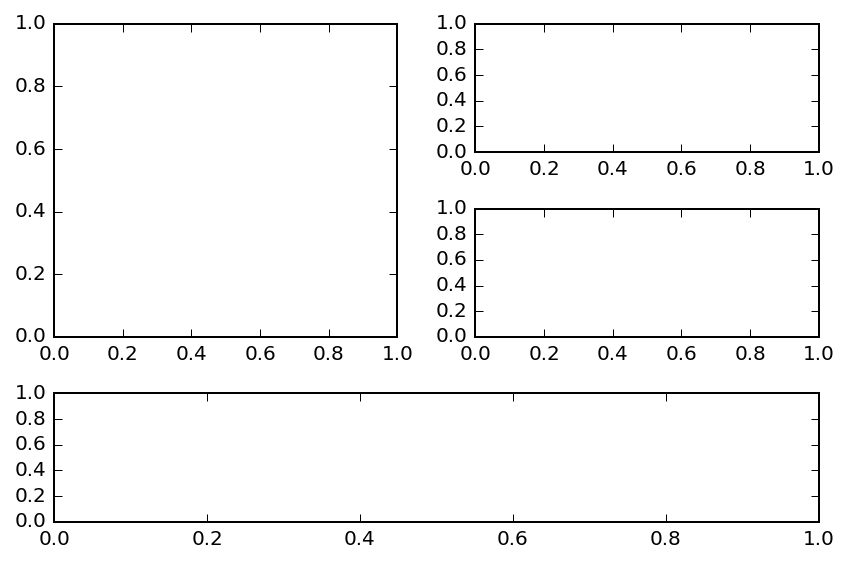

In [7]:
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(3, 2)
s1 = gs[:2, 0]
s2 = gs[0, 1]
s3 = gs[3]
s4 = gs[-1, :]

# Draw the grid using the SubplotSpec objects created above.
plt.subplot(s1)
plt.subplot(s2)
plt.subplot(s3)
plt.subplot(s4)
plt.tight_layout()

## Conclusion

And, that will bring us to end of this lesson, and that will also wrap up our look at subplotting in matplotlib. Over the past few lessons, you've seen how to create simple grids of subplots using the `subplot` function. You've seen how to use the simple `subplot` function to put together a fairly complex visualization function called a scatterplot matrix. You've seen how to use the `subplot2grid` helper function to create much more complex and interesting subplot layouts. And, finally, you've seen how the `GridSpec` and `SubplotSpec` classes work, giving you a deeper level of understanding of the matplotlib subplotting system. With the tools you've learned over the past several lessons, you should be ready to tackle just about any subplotting challenge that your research can throw at you.